# Machine Learning 101

This is a jump start exercise in machine learning using TensorFlow 2.0. In this exercise, we will build, train, and valdate a Neural Network model which will say whether a given image is of a Cat or not!

## Install the necessary packages.

Python packages can be installed by pip. To install a package, type "pip install package_name" at the terminal. 

You can execute commands on terminal from Jupyter notebook simply by prepending ! to the command.

Warning: Do not run Jupyter Notebooks from untrusted sources.

In [1]:
!pip install numpy h5py matplotlib scikit-learn

Import the necessary libraries

In [134]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np
import h5py
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [7]:
# load data
train = h5py.File('data/cat/train_catvnoncat.h5', 'r')
x_train = np.array(train["train_set_x"][:])
y_train = np.array(train["train_set_y"][:])

test = h5py.File('data/cat/test_catvnoncat.h5', 'r')
x_test = np.array(test["test_set_x"][:])
y_test = np.array(test["test_set_y"][:])

### Explore the data

In [17]:
print('Number of training examples: {}'.format(x_train.shape[0]))
print('Number of test examples: {}'.format(x_test.shape[0]))
print('Dimension of an image is: {}'.format(x_train[0].shape))
print('Shape of train set features : {}'.format(x_train.shape))
print('Shape of train set values : {}'.format(y_train.shape))
print('Shape of test set features : {}'.format(x_test.shape))
print('Shape of test set values : {}'.format(y_test.shape))

Number of training examples: 209
Number of test examples: 50
Dimension of an image is: (64, 64, 3)
Shape of train set features : (209, 64, 64, 3)
Shape of train set values : (209,)
Shape of test set features : (50, 64, 64, 3)
Shape of test set values : (50,)


In [32]:
def plot_images(images_arr, labels_arr):
    """
    This function will plot images in the form of a grid with 1 row and 5 columns 
    where images are placed in each column.
    
    credits to TensorFlow Team
    https://www.tensorflow.org/tutorials/images/classification
    """
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, label, ax in zip(images_arr, labels_arr, axes):
        ax.imshow(img)
        ax.axis('off')
        ax.set_title('Cat' if label else "Not a Cat")
    plt.show()


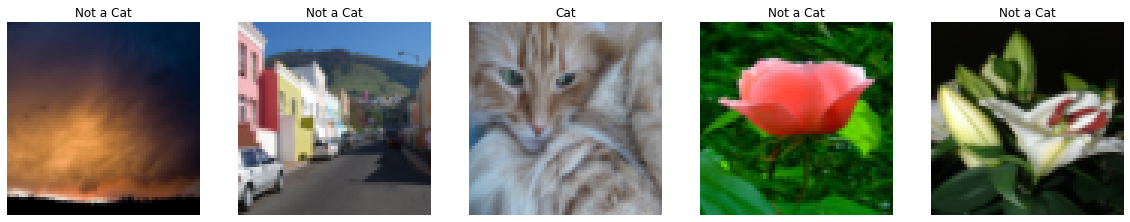

In [33]:
plot_images(x_train[:5], y_train[:5])

In [102]:
# reshape data
image_flat_dim = 64 * 64 * 3

x_train = x_train.reshape(-1, image_flat_dim)/255  # Normalize and reshape the input
y_train = y_train.reshape(-1, 1)

x_test = x_test.reshape(-1, image_flat_dim)/255
y_test = y_test.reshape(-1, 1)

In [103]:
print('Number of training examples: {}'.format(x_train.shape[0]))
print('Number of test examples: {}'.format(x_test.shape[0]))
print('Dimension of an image is: {}'.format(x_train[0].shape))
print('Shape of train set features : {}'.format(x_train.shape))
print('Shape of train set values : {}'.format(y_train.shape))
print('Shape of test set features : {}'.format(x_test.shape))
print('Shape of test set values : {}'.format(y_test.shape))

Number of training examples: 209
Number of test examples: 50
Dimension of an image is: (12288,)
Shape of train set features : (209, 12288)
Shape of train set values : (209, 1)
Shape of test set features : (50, 12288)
Shape of test set values : (50, 1)


## Create and train model

The model consists of two hidden layers with 128 neurons in each layer. Relu activation function is used for the hidden layers and sigmoid is used for output layer.

In [205]:
model = Sequential([
    Dense(32, input_shape=(image_flat_dim,), activation='relu'),
    Dense(16, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')
])

## Compile the model
For this model, we will use SGD as the optimizer with default learing rate of 0.001. Binary cross entropy is used as loss function.

In [206]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# print summary 
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_94 (Dense)             (None, 32)                393248    
_________________________________________________________________
dense_95 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_96 (Dense)             (None, 4)                 68        
_________________________________________________________________
dense_97 (Dense)             (None, 1)                 5         
Total params: 393,849
Trainable params: 393,849
Non-trainable params: 0
_________________________________________________________________


### Fit the model

In [207]:
epochs = 2500
history = model.fit(x_train, y_train, epochs=epochs, verbose=2)

Train on 188 samples, validate on 21 samples
Epoch 1/2500
188/188 - 1s - loss: 0.8853 - accuracy: 0.6064 - val_loss: 0.4796 - val_accuracy: 0.7619
Epoch 2/2500
188/188 - 0s - loss: 0.7040 - accuracy: 0.6170 - val_loss: 0.5809 - val_accuracy: 0.7619
Epoch 3/2500
188/188 - 0s - loss: 0.7060 - accuracy: 0.5426 - val_loss: 0.5987 - val_accuracy: 0.7619
Epoch 4/2500
188/188 - 0s - loss: 0.6478 - accuracy: 0.6436 - val_loss: 0.6159 - val_accuracy: 0.6667
Epoch 5/2500
188/188 - 0s - loss: 0.5830 - accuracy: 0.6968 - val_loss: 0.5324 - val_accuracy: 0.7619
Epoch 6/2500
188/188 - 0s - loss: 0.5744 - accuracy: 0.6809 - val_loss: 0.7172 - val_accuracy: 0.4762
Epoch 7/2500
188/188 - 0s - loss: 0.5716 - accuracy: 0.6755 - val_loss: 0.5640 - val_accuracy: 0.7619
Epoch 8/2500
188/188 - 0s - loss: 0.5523 - accuracy: 0.7234 - val_loss: 0.5395 - val_accuracy: 0.7619
Epoch 9/2500
188/188 - 0s - loss: 0.5727 - accuracy: 0.7234 - val_loss: 0.5805 - val_accuracy: 0.7619
Epoch 10/2500
188/188 - 0s - loss: 0.

Epoch 81/2500
188/188 - 0s - loss: 0.0268 - accuracy: 1.0000 - val_loss: 1.1600 - val_accuracy: 0.4762
Epoch 82/2500
188/188 - 0s - loss: 0.0266 - accuracy: 1.0000 - val_loss: 1.1344 - val_accuracy: 0.4762
Epoch 83/2500
188/188 - 0s - loss: 0.0264 - accuracy: 1.0000 - val_loss: 1.1479 - val_accuracy: 0.5238
Epoch 84/2500
188/188 - 0s - loss: 0.0238 - accuracy: 1.0000 - val_loss: 1.2137 - val_accuracy: 0.4286
Epoch 85/2500
188/188 - 0s - loss: 0.0404 - accuracy: 0.9947 - val_loss: 1.1529 - val_accuracy: 0.4762
Epoch 86/2500
188/188 - 0s - loss: 0.0308 - accuracy: 0.9947 - val_loss: 1.1600 - val_accuracy: 0.5714
Epoch 87/2500
188/188 - 0s - loss: 0.0259 - accuracy: 1.0000 - val_loss: 1.1529 - val_accuracy: 0.4762
Epoch 88/2500
188/188 - 0s - loss: 0.0258 - accuracy: 1.0000 - val_loss: 1.2009 - val_accuracy: 0.5238
Epoch 89/2500
188/188 - 0s - loss: 0.0254 - accuracy: 0.9947 - val_loss: 1.1782 - val_accuracy: 0.5238
Epoch 90/2500
188/188 - 0s - loss: 0.0249 - accuracy: 1.0000 - val_loss: 

Epoch 160/2500
188/188 - 0s - loss: 0.0047 - accuracy: 1.0000 - val_loss: 1.5067 - val_accuracy: 0.5238
Epoch 161/2500
188/188 - 0s - loss: 0.0047 - accuracy: 1.0000 - val_loss: 1.5104 - val_accuracy: 0.4762
Epoch 162/2500
188/188 - 0s - loss: 0.0047 - accuracy: 1.0000 - val_loss: 1.5427 - val_accuracy: 0.5238
Epoch 163/2500
188/188 - 0s - loss: 0.0049 - accuracy: 1.0000 - val_loss: 1.5124 - val_accuracy: 0.5238
Epoch 164/2500
188/188 - 0s - loss: 0.0050 - accuracy: 1.0000 - val_loss: 1.5073 - val_accuracy: 0.5238
Epoch 165/2500
188/188 - 0s - loss: 0.0049 - accuracy: 1.0000 - val_loss: 1.5284 - val_accuracy: 0.4762
Epoch 166/2500
188/188 - 0s - loss: 0.0048 - accuracy: 1.0000 - val_loss: 1.5380 - val_accuracy: 0.5238
Epoch 167/2500
188/188 - 0s - loss: 0.0050 - accuracy: 1.0000 - val_loss: 1.5311 - val_accuracy: 0.5238
Epoch 168/2500
188/188 - 0s - loss: 0.0049 - accuracy: 1.0000 - val_loss: 1.5214 - val_accuracy: 0.4762
Epoch 169/2500
188/188 - 0s - loss: 0.0048 - accuracy: 1.0000 - 

Epoch 239/2500
188/188 - 0s - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.7396 - val_accuracy: 0.5238
Epoch 240/2500
188/188 - 0s - loss: 0.0018 - accuracy: 1.0000 - val_loss: 1.7322 - val_accuracy: 0.5238
Epoch 241/2500
188/188 - 0s - loss: 0.0018 - accuracy: 1.0000 - val_loss: 1.7387 - val_accuracy: 0.5238
Epoch 242/2500
188/188 - 0s - loss: 0.0018 - accuracy: 1.0000 - val_loss: 1.7448 - val_accuracy: 0.5238
Epoch 243/2500
188/188 - 0s - loss: 0.0018 - accuracy: 1.0000 - val_loss: 1.7389 - val_accuracy: 0.5238
Epoch 244/2500
188/188 - 0s - loss: 0.0018 - accuracy: 1.0000 - val_loss: 1.7489 - val_accuracy: 0.4762
Epoch 245/2500
188/188 - 0s - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.7469 - val_accuracy: 0.5238
Epoch 246/2500
188/188 - 0s - loss: 0.0018 - accuracy: 1.0000 - val_loss: 1.7461 - val_accuracy: 0.5238
Epoch 247/2500
188/188 - 0s - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.7480 - val_accuracy: 0.5238
Epoch 248/2500
188/188 - 0s - loss: 0.0017 - accuracy: 1.0000 - 

Epoch 318/2500
188/188 - 0s - loss: 9.4992e-04 - accuracy: 1.0000 - val_loss: 1.9018 - val_accuracy: 0.5238
Epoch 319/2500
188/188 - 0s - loss: 9.2806e-04 - accuracy: 1.0000 - val_loss: 1.8961 - val_accuracy: 0.5238
Epoch 320/2500
188/188 - 0s - loss: 9.4754e-04 - accuracy: 1.0000 - val_loss: 1.8924 - val_accuracy: 0.5238
Epoch 321/2500
188/188 - 0s - loss: 9.2995e-04 - accuracy: 1.0000 - val_loss: 1.8936 - val_accuracy: 0.5238
Epoch 322/2500
188/188 - 0s - loss: 9.3059e-04 - accuracy: 1.0000 - val_loss: 1.9027 - val_accuracy: 0.5238
Epoch 323/2500
188/188 - 0s - loss: 9.3002e-04 - accuracy: 1.0000 - val_loss: 1.9053 - val_accuracy: 0.5238
Epoch 324/2500
188/188 - 0s - loss: 9.0582e-04 - accuracy: 1.0000 - val_loss: 1.8994 - val_accuracy: 0.5238
Epoch 325/2500
188/188 - 0s - loss: 9.0430e-04 - accuracy: 1.0000 - val_loss: 1.9028 - val_accuracy: 0.5238
Epoch 326/2500
188/188 - 0s - loss: 8.8519e-04 - accuracy: 1.0000 - val_loss: 1.9072 - val_accuracy: 0.5238
Epoch 327/2500
188/188 - 0s 

Epoch 394/2500
188/188 - 0s - loss: 5.5067e-04 - accuracy: 1.0000 - val_loss: 2.0216 - val_accuracy: 0.5238
Epoch 395/2500
188/188 - 0s - loss: 5.5978e-04 - accuracy: 1.0000 - val_loss: 2.0182 - val_accuracy: 0.5238
Epoch 396/2500
188/188 - 0s - loss: 5.4516e-04 - accuracy: 1.0000 - val_loss: 2.0202 - val_accuracy: 0.4286
Epoch 397/2500
188/188 - 0s - loss: 5.5466e-04 - accuracy: 1.0000 - val_loss: 2.0144 - val_accuracy: 0.5238
Epoch 398/2500
188/188 - 0s - loss: 5.4088e-04 - accuracy: 1.0000 - val_loss: 2.0197 - val_accuracy: 0.5238
Epoch 399/2500
188/188 - 0s - loss: 5.3427e-04 - accuracy: 1.0000 - val_loss: 2.0319 - val_accuracy: 0.5238
Epoch 400/2500
188/188 - 0s - loss: 5.4077e-04 - accuracy: 1.0000 - val_loss: 2.0362 - val_accuracy: 0.5238
Epoch 401/2500
188/188 - 0s - loss: 5.2838e-04 - accuracy: 1.0000 - val_loss: 2.0284 - val_accuracy: 0.5238
Epoch 402/2500
188/188 - 0s - loss: 5.2408e-04 - accuracy: 1.0000 - val_loss: 2.0270 - val_accuracy: 0.5238
Epoch 403/2500
188/188 - 0s 

Epoch 470/2500
188/188 - 0s - loss: 3.4768e-04 - accuracy: 1.0000 - val_loss: 2.1201 - val_accuracy: 0.5238
Epoch 471/2500
188/188 - 0s - loss: 3.4856e-04 - accuracy: 1.0000 - val_loss: 2.1274 - val_accuracy: 0.5238
Epoch 472/2500
188/188 - 0s - loss: 3.4332e-04 - accuracy: 1.0000 - val_loss: 2.1260 - val_accuracy: 0.5238
Epoch 473/2500
188/188 - 0s - loss: 3.4234e-04 - accuracy: 1.0000 - val_loss: 2.1295 - val_accuracy: 0.5238
Epoch 474/2500
188/188 - 0s - loss: 3.4377e-04 - accuracy: 1.0000 - val_loss: 2.1352 - val_accuracy: 0.5238
Epoch 475/2500
188/188 - 0s - loss: 3.4008e-04 - accuracy: 1.0000 - val_loss: 2.1290 - val_accuracy: 0.5238
Epoch 476/2500
188/188 - 0s - loss: 3.3581e-04 - accuracy: 1.0000 - val_loss: 2.1320 - val_accuracy: 0.5238
Epoch 477/2500
188/188 - 0s - loss: 3.3875e-04 - accuracy: 1.0000 - val_loss: 2.1451 - val_accuracy: 0.5238
Epoch 478/2500
188/188 - 0s - loss: 3.3306e-04 - accuracy: 1.0000 - val_loss: 2.1397 - val_accuracy: 0.5238
Epoch 479/2500
188/188 - 0s 

Epoch 546/2500
188/188 - 0s - loss: 2.2733e-04 - accuracy: 1.0000 - val_loss: 2.2353 - val_accuracy: 0.5238
Epoch 547/2500
188/188 - 0s - loss: 2.2640e-04 - accuracy: 1.0000 - val_loss: 2.2306 - val_accuracy: 0.5238
Epoch 548/2500
188/188 - 0s - loss: 2.2520e-04 - accuracy: 1.0000 - val_loss: 2.2303 - val_accuracy: 0.5238
Epoch 549/2500
188/188 - 0s - loss: 2.2420e-04 - accuracy: 1.0000 - val_loss: 2.2349 - val_accuracy: 0.5238
Epoch 550/2500
188/188 - 0s - loss: 2.2350e-04 - accuracy: 1.0000 - val_loss: 2.2405 - val_accuracy: 0.5238
Epoch 551/2500
188/188 - 0s - loss: 2.2670e-04 - accuracy: 1.0000 - val_loss: 2.2307 - val_accuracy: 0.4762
Epoch 552/2500
188/188 - 0s - loss: 2.2282e-04 - accuracy: 1.0000 - val_loss: 2.2202 - val_accuracy: 0.5238
Epoch 553/2500
188/188 - 0s - loss: 2.2396e-04 - accuracy: 1.0000 - val_loss: 2.2271 - val_accuracy: 0.5238
Epoch 554/2500
188/188 - 0s - loss: 2.1800e-04 - accuracy: 1.0000 - val_loss: 2.2436 - val_accuracy: 0.5238
Epoch 555/2500
188/188 - 0s 

Epoch 622/2500
188/188 - 0s - loss: 1.5688e-04 - accuracy: 1.0000 - val_loss: 2.3217 - val_accuracy: 0.5238
Epoch 623/2500
188/188 - 0s - loss: 1.5409e-04 - accuracy: 1.0000 - val_loss: 2.3149 - val_accuracy: 0.5238
Epoch 624/2500
188/188 - 0s - loss: 1.5414e-04 - accuracy: 1.0000 - val_loss: 2.3180 - val_accuracy: 0.5238
Epoch 625/2500
188/188 - 0s - loss: 1.5299e-04 - accuracy: 1.0000 - val_loss: 2.3301 - val_accuracy: 0.5238
Epoch 626/2500
188/188 - 0s - loss: 1.5272e-04 - accuracy: 1.0000 - val_loss: 2.3302 - val_accuracy: 0.5238
Epoch 627/2500
188/188 - 0s - loss: 1.5095e-04 - accuracy: 1.0000 - val_loss: 2.3271 - val_accuracy: 0.5238
Epoch 628/2500
188/188 - 0s - loss: 1.5184e-04 - accuracy: 1.0000 - val_loss: 2.3285 - val_accuracy: 0.5238
Epoch 629/2500
188/188 - 0s - loss: 1.5025e-04 - accuracy: 1.0000 - val_loss: 2.3278 - val_accuracy: 0.5238
Epoch 630/2500
188/188 - 0s - loss: 1.4924e-04 - accuracy: 1.0000 - val_loss: 2.3289 - val_accuracy: 0.5238
Epoch 631/2500
188/188 - 0s 

Epoch 698/2500
188/188 - 0s - loss: 1.0817e-04 - accuracy: 1.0000 - val_loss: 2.3983 - val_accuracy: 0.5238
Epoch 699/2500
188/188 - 0s - loss: 1.0813e-04 - accuracy: 1.0000 - val_loss: 2.4018 - val_accuracy: 0.5238
Epoch 700/2500
188/188 - 0s - loss: 1.0729e-04 - accuracy: 1.0000 - val_loss: 2.4040 - val_accuracy: 0.5238
Epoch 701/2500
188/188 - 0s - loss: 1.0723e-04 - accuracy: 1.0000 - val_loss: 2.4101 - val_accuracy: 0.5238
Epoch 702/2500
188/188 - 0s - loss: 1.0627e-04 - accuracy: 1.0000 - val_loss: 2.4147 - val_accuracy: 0.5238
Epoch 703/2500
188/188 - 0s - loss: 1.0596e-04 - accuracy: 1.0000 - val_loss: 2.4107 - val_accuracy: 0.5238
Epoch 704/2500
188/188 - 0s - loss: 1.0513e-04 - accuracy: 1.0000 - val_loss: 2.4108 - val_accuracy: 0.5238
Epoch 705/2500
188/188 - 0s - loss: 1.0562e-04 - accuracy: 1.0000 - val_loss: 2.4093 - val_accuracy: 0.5238
Epoch 706/2500
188/188 - 0s - loss: 1.0470e-04 - accuracy: 1.0000 - val_loss: 2.4141 - val_accuracy: 0.5238
Epoch 707/2500
188/188 - 0s 

Epoch 774/2500
188/188 - 0s - loss: 7.7037e-05 - accuracy: 1.0000 - val_loss: 2.4872 - val_accuracy: 0.5238
Epoch 775/2500
188/188 - 0s - loss: 7.6749e-05 - accuracy: 1.0000 - val_loss: 2.4818 - val_accuracy: 0.5238
Epoch 776/2500
188/188 - 0s - loss: 7.6250e-05 - accuracy: 1.0000 - val_loss: 2.4790 - val_accuracy: 0.5238
Epoch 777/2500
188/188 - 0s - loss: 7.6296e-05 - accuracy: 1.0000 - val_loss: 2.4860 - val_accuracy: 0.5238
Epoch 778/2500
188/188 - 0s - loss: 7.5961e-05 - accuracy: 1.0000 - val_loss: 2.4847 - val_accuracy: 0.5238
Epoch 779/2500
188/188 - 0s - loss: 7.5703e-05 - accuracy: 1.0000 - val_loss: 2.4951 - val_accuracy: 0.5238
Epoch 780/2500
188/188 - 0s - loss: 7.5015e-05 - accuracy: 1.0000 - val_loss: 2.4944 - val_accuracy: 0.5238
Epoch 781/2500
188/188 - 0s - loss: 7.4589e-05 - accuracy: 1.0000 - val_loss: 2.4912 - val_accuracy: 0.5238
Epoch 782/2500
188/188 - 0s - loss: 7.4386e-05 - accuracy: 1.0000 - val_loss: 2.4907 - val_accuracy: 0.5238
Epoch 783/2500
188/188 - 0s 

Epoch 850/2500
188/188 - 0s - loss: 5.6288e-05 - accuracy: 1.0000 - val_loss: 2.5568 - val_accuracy: 0.5238
Epoch 851/2500
188/188 - 0s - loss: 5.5433e-05 - accuracy: 1.0000 - val_loss: 2.5627 - val_accuracy: 0.5238
Epoch 852/2500
188/188 - 0s - loss: 5.5003e-05 - accuracy: 1.0000 - val_loss: 2.5645 - val_accuracy: 0.5238
Epoch 853/2500
188/188 - 0s - loss: 5.5057e-05 - accuracy: 1.0000 - val_loss: 2.5703 - val_accuracy: 0.5238
Epoch 854/2500
188/188 - 0s - loss: 5.4518e-05 - accuracy: 1.0000 - val_loss: 2.5694 - val_accuracy: 0.5238
Epoch 855/2500
188/188 - 0s - loss: 5.4135e-05 - accuracy: 1.0000 - val_loss: 2.5693 - val_accuracy: 0.5238
Epoch 856/2500
188/188 - 0s - loss: 5.3927e-05 - accuracy: 1.0000 - val_loss: 2.5709 - val_accuracy: 0.5238
Epoch 857/2500
188/188 - 0s - loss: 5.3760e-05 - accuracy: 1.0000 - val_loss: 2.5691 - val_accuracy: 0.5238
Epoch 858/2500
188/188 - 0s - loss: 5.3705e-05 - accuracy: 1.0000 - val_loss: 2.5690 - val_accuracy: 0.5238
Epoch 859/2500
188/188 - 0s 

Epoch 926/2500
188/188 - 0s - loss: 4.0598e-05 - accuracy: 1.0000 - val_loss: 2.6311 - val_accuracy: 0.5238
Epoch 927/2500
188/188 - 0s - loss: 4.0139e-05 - accuracy: 1.0000 - val_loss: 2.6361 - val_accuracy: 0.5238
Epoch 928/2500
188/188 - 0s - loss: 4.0107e-05 - accuracy: 1.0000 - val_loss: 2.6408 - val_accuracy: 0.5238
Epoch 929/2500
188/188 - 0s - loss: 4.0023e-05 - accuracy: 1.0000 - val_loss: 2.6414 - val_accuracy: 0.5238
Epoch 930/2500
188/188 - 0s - loss: 3.9682e-05 - accuracy: 1.0000 - val_loss: 2.6408 - val_accuracy: 0.5238
Epoch 931/2500
188/188 - 0s - loss: 3.9579e-05 - accuracy: 1.0000 - val_loss: 2.6439 - val_accuracy: 0.5238
Epoch 932/2500
188/188 - 0s - loss: 3.9342e-05 - accuracy: 1.0000 - val_loss: 2.6430 - val_accuracy: 0.5238
Epoch 933/2500
188/188 - 0s - loss: 3.9129e-05 - accuracy: 1.0000 - val_loss: 2.6436 - val_accuracy: 0.5238
Epoch 934/2500
188/188 - 0s - loss: 3.9211e-05 - accuracy: 1.0000 - val_loss: 2.6480 - val_accuracy: 0.5238
Epoch 935/2500
188/188 - 0s 

Epoch 1002/2500
188/188 - 0s - loss: 2.9691e-05 - accuracy: 1.0000 - val_loss: 2.7099 - val_accuracy: 0.5238
Epoch 1003/2500
188/188 - 0s - loss: 2.9451e-05 - accuracy: 1.0000 - val_loss: 2.7125 - val_accuracy: 0.5238
Epoch 1004/2500
188/188 - 0s - loss: 2.9340e-05 - accuracy: 1.0000 - val_loss: 2.7164 - val_accuracy: 0.5238
Epoch 1005/2500
188/188 - 0s - loss: 2.9301e-05 - accuracy: 1.0000 - val_loss: 2.7179 - val_accuracy: 0.5238
Epoch 1006/2500
188/188 - 0s - loss: 2.9306e-05 - accuracy: 1.0000 - val_loss: 2.7140 - val_accuracy: 0.5238
Epoch 1007/2500
188/188 - 0s - loss: 2.9295e-05 - accuracy: 1.0000 - val_loss: 2.7132 - val_accuracy: 0.5238
Epoch 1008/2500
188/188 - 0s - loss: 2.8879e-05 - accuracy: 1.0000 - val_loss: 2.7180 - val_accuracy: 0.5238
Epoch 1009/2500
188/188 - 0s - loss: 2.9187e-05 - accuracy: 1.0000 - val_loss: 2.7223 - val_accuracy: 0.5238
Epoch 1010/2500
188/188 - 0s - loss: 2.8674e-05 - accuracy: 1.0000 - val_loss: 2.7138 - val_accuracy: 0.5238
Epoch 1011/2500
188

Epoch 1078/2500
188/188 - 0s - loss: 2.2009e-05 - accuracy: 1.0000 - val_loss: 2.7828 - val_accuracy: 0.5238
Epoch 1079/2500
188/188 - 0s - loss: 2.1945e-05 - accuracy: 1.0000 - val_loss: 2.7860 - val_accuracy: 0.5238
Epoch 1080/2500
188/188 - 0s - loss: 2.1836e-05 - accuracy: 1.0000 - val_loss: 2.7797 - val_accuracy: 0.5238
Epoch 1081/2500
188/188 - 0s - loss: 2.1676e-05 - accuracy: 1.0000 - val_loss: 2.7829 - val_accuracy: 0.5238
Epoch 1082/2500
188/188 - 0s - loss: 2.1561e-05 - accuracy: 1.0000 - val_loss: 2.7865 - val_accuracy: 0.5238
Epoch 1083/2500
188/188 - 0s - loss: 2.1461e-05 - accuracy: 1.0000 - val_loss: 2.7897 - val_accuracy: 0.5238
Epoch 1084/2500
188/188 - 0s - loss: 2.1402e-05 - accuracy: 1.0000 - val_loss: 2.7913 - val_accuracy: 0.5238
Epoch 1085/2500
188/188 - 0s - loss: 2.1336e-05 - accuracy: 1.0000 - val_loss: 2.7902 - val_accuracy: 0.5238
Epoch 1086/2500
188/188 - 0s - loss: 2.1411e-05 - accuracy: 1.0000 - val_loss: 2.7871 - val_accuracy: 0.4762
Epoch 1087/2500
188

Epoch 1154/2500
188/188 - 0s - loss: 1.6298e-05 - accuracy: 1.0000 - val_loss: 2.8543 - val_accuracy: 0.5238
Epoch 1155/2500
188/188 - 0s - loss: 1.6233e-05 - accuracy: 1.0000 - val_loss: 2.8542 - val_accuracy: 0.5238
Epoch 1156/2500
188/188 - 0s - loss: 1.6185e-05 - accuracy: 1.0000 - val_loss: 2.8537 - val_accuracy: 0.5238
Epoch 1157/2500
188/188 - 0s - loss: 1.6224e-05 - accuracy: 1.0000 - val_loss: 2.8551 - val_accuracy: 0.4762
Epoch 1158/2500
188/188 - 0s - loss: 1.6117e-05 - accuracy: 1.0000 - val_loss: 2.8528 - val_accuracy: 0.5238
Epoch 1159/2500
188/188 - 0s - loss: 1.6086e-05 - accuracy: 1.0000 - val_loss: 2.8515 - val_accuracy: 0.5238
Epoch 1160/2500
188/188 - 0s - loss: 1.5956e-05 - accuracy: 1.0000 - val_loss: 2.8593 - val_accuracy: 0.5238
Epoch 1161/2500
188/188 - 0s - loss: 1.5896e-05 - accuracy: 1.0000 - val_loss: 2.8625 - val_accuracy: 0.5238
Epoch 1162/2500
188/188 - 0s - loss: 1.5985e-05 - accuracy: 1.0000 - val_loss: 2.8610 - val_accuracy: 0.5238
Epoch 1163/2500
188

Epoch 1230/2500
188/188 - 0s - loss: 1.2200e-05 - accuracy: 1.0000 - val_loss: 2.9177 - val_accuracy: 0.5238
Epoch 1231/2500
188/188 - 0s - loss: 1.2185e-05 - accuracy: 1.0000 - val_loss: 2.9194 - val_accuracy: 0.5238
Epoch 1232/2500
188/188 - 0s - loss: 1.2118e-05 - accuracy: 1.0000 - val_loss: 2.9172 - val_accuracy: 0.5238
Epoch 1233/2500
188/188 - 0s - loss: 1.2085e-05 - accuracy: 1.0000 - val_loss: 2.9229 - val_accuracy: 0.5238
Epoch 1234/2500
188/188 - 0s - loss: 1.2109e-05 - accuracy: 1.0000 - val_loss: 2.9245 - val_accuracy: 0.5238
Epoch 1235/2500
188/188 - 0s - loss: 1.1983e-05 - accuracy: 1.0000 - val_loss: 2.9189 - val_accuracy: 0.5238
Epoch 1236/2500
188/188 - 0s - loss: 1.1952e-05 - accuracy: 1.0000 - val_loss: 2.9229 - val_accuracy: 0.5238
Epoch 1237/2500
188/188 - 0s - loss: 1.1881e-05 - accuracy: 1.0000 - val_loss: 2.9278 - val_accuracy: 0.5238
Epoch 1238/2500
188/188 - 0s - loss: 1.1869e-05 - accuracy: 1.0000 - val_loss: 2.9304 - val_accuracy: 0.5238
Epoch 1239/2500
188

Epoch 1306/2500
188/188 - 0s - loss: 9.1765e-06 - accuracy: 1.0000 - val_loss: 2.9855 - val_accuracy: 0.5238
Epoch 1307/2500
188/188 - 0s - loss: 9.2355e-06 - accuracy: 1.0000 - val_loss: 2.9915 - val_accuracy: 0.5238
Epoch 1308/2500
188/188 - 0s - loss: 9.0859e-06 - accuracy: 1.0000 - val_loss: 2.9892 - val_accuracy: 0.5238
Epoch 1309/2500
188/188 - 0s - loss: 9.1074e-06 - accuracy: 1.0000 - val_loss: 2.9884 - val_accuracy: 0.5238
Epoch 1310/2500
188/188 - 0s - loss: 9.0323e-06 - accuracy: 1.0000 - val_loss: 2.9877 - val_accuracy: 0.5238
Epoch 1311/2500
188/188 - 0s - loss: 9.0250e-06 - accuracy: 1.0000 - val_loss: 2.9897 - val_accuracy: 0.5238
Epoch 1312/2500
188/188 - 0s - loss: 8.9900e-06 - accuracy: 1.0000 - val_loss: 2.9924 - val_accuracy: 0.5238
Epoch 1313/2500
188/188 - 0s - loss: 8.9389e-06 - accuracy: 1.0000 - val_loss: 2.9890 - val_accuracy: 0.5238
Epoch 1314/2500
188/188 - 0s - loss: 8.9007e-06 - accuracy: 1.0000 - val_loss: 2.9920 - val_accuracy: 0.5238
Epoch 1315/2500
188

Epoch 1382/2500
188/188 - 0s - loss: 6.9350e-06 - accuracy: 1.0000 - val_loss: 3.0516 - val_accuracy: 0.5238
Epoch 1383/2500
188/188 - 0s - loss: 6.9531e-06 - accuracy: 1.0000 - val_loss: 3.0595 - val_accuracy: 0.5238
Epoch 1384/2500
188/188 - 0s - loss: 6.8718e-06 - accuracy: 1.0000 - val_loss: 3.0568 - val_accuracy: 0.5238
Epoch 1385/2500
188/188 - 0s - loss: 6.8547e-06 - accuracy: 1.0000 - val_loss: 3.0505 - val_accuracy: 0.5238
Epoch 1386/2500
188/188 - 0s - loss: 6.8601e-06 - accuracy: 1.0000 - val_loss: 3.0559 - val_accuracy: 0.5238
Epoch 1387/2500
188/188 - 0s - loss: 6.8070e-06 - accuracy: 1.0000 - val_loss: 3.0566 - val_accuracy: 0.5238
Epoch 1388/2500
188/188 - 0s - loss: 6.7832e-06 - accuracy: 1.0000 - val_loss: 3.0565 - val_accuracy: 0.5238
Epoch 1389/2500
188/188 - 0s - loss: 6.7478e-06 - accuracy: 1.0000 - val_loss: 3.0604 - val_accuracy: 0.5238
Epoch 1390/2500
188/188 - 0s - loss: 6.7128e-06 - accuracy: 1.0000 - val_loss: 3.0608 - val_accuracy: 0.5238
Epoch 1391/2500
188

Epoch 1458/2500
188/188 - 0s - loss: 5.2380e-06 - accuracy: 1.0000 - val_loss: 3.1222 - val_accuracy: 0.5238
Epoch 1459/2500
188/188 - 0s - loss: 5.2274e-06 - accuracy: 1.0000 - val_loss: 3.1216 - val_accuracy: 0.5238
Epoch 1460/2500
188/188 - 0s - loss: 5.1981e-06 - accuracy: 1.0000 - val_loss: 3.1192 - val_accuracy: 0.5238
Epoch 1461/2500
188/188 - 0s - loss: 5.1926e-06 - accuracy: 1.0000 - val_loss: 3.1183 - val_accuracy: 0.5238
Epoch 1462/2500
188/188 - 0s - loss: 5.1517e-06 - accuracy: 1.0000 - val_loss: 3.1255 - val_accuracy: 0.5238
Epoch 1463/2500
188/188 - 0s - loss: 5.1734e-06 - accuracy: 1.0000 - val_loss: 3.1237 - val_accuracy: 0.5238
Epoch 1464/2500
188/188 - 0s - loss: 5.1100e-06 - accuracy: 1.0000 - val_loss: 3.1275 - val_accuracy: 0.5238
Epoch 1465/2500
188/188 - 0s - loss: 5.0985e-06 - accuracy: 1.0000 - val_loss: 3.1262 - val_accuracy: 0.5238
Epoch 1466/2500
188/188 - 0s - loss: 5.0874e-06 - accuracy: 1.0000 - val_loss: 3.1271 - val_accuracy: 0.5238
Epoch 1467/2500
188

Epoch 1534/2500
188/188 - 0s - loss: 3.9634e-06 - accuracy: 1.0000 - val_loss: 3.1889 - val_accuracy: 0.5238
Epoch 1535/2500
188/188 - 0s - loss: 3.9546e-06 - accuracy: 1.0000 - val_loss: 3.1853 - val_accuracy: 0.5238
Epoch 1536/2500
188/188 - 0s - loss: 3.9396e-06 - accuracy: 1.0000 - val_loss: 3.1871 - val_accuracy: 0.5238
Epoch 1537/2500
188/188 - 0s - loss: 3.9426e-06 - accuracy: 1.0000 - val_loss: 3.1889 - val_accuracy: 0.5238
Epoch 1538/2500
188/188 - 0s - loss: 3.9150e-06 - accuracy: 1.0000 - val_loss: 3.1894 - val_accuracy: 0.5238
Epoch 1539/2500
188/188 - 0s - loss: 3.9329e-06 - accuracy: 1.0000 - val_loss: 3.1895 - val_accuracy: 0.4762
Epoch 1540/2500
188/188 - 0s - loss: 3.9121e-06 - accuracy: 1.0000 - val_loss: 3.1806 - val_accuracy: 0.5238
Epoch 1541/2500
188/188 - 0s - loss: 3.9396e-06 - accuracy: 1.0000 - val_loss: 3.1790 - val_accuracy: 0.5238
Epoch 1542/2500
188/188 - 0s - loss: 3.8727e-06 - accuracy: 1.0000 - val_loss: 3.1888 - val_accuracy: 0.5238
Epoch 1543/2500
188

Epoch 1610/2500
188/188 - 0s - loss: 3.0129e-06 - accuracy: 1.0000 - val_loss: 3.2521 - val_accuracy: 0.5238
Epoch 1611/2500
188/188 - 0s - loss: 3.0128e-06 - accuracy: 1.0000 - val_loss: 3.2544 - val_accuracy: 0.5238
Epoch 1612/2500
188/188 - 0s - loss: 2.9893e-06 - accuracy: 1.0000 - val_loss: 3.2548 - val_accuracy: 0.5238
Epoch 1613/2500
188/188 - 0s - loss: 3.0020e-06 - accuracy: 1.0000 - val_loss: 3.2486 - val_accuracy: 0.5238
Epoch 1614/2500
188/188 - 0s - loss: 2.9752e-06 - accuracy: 1.0000 - val_loss: 3.2466 - val_accuracy: 0.5238
Epoch 1615/2500
188/188 - 0s - loss: 2.9742e-06 - accuracy: 1.0000 - val_loss: 3.2528 - val_accuracy: 0.5238
Epoch 1616/2500
188/188 - 0s - loss: 2.9640e-06 - accuracy: 1.0000 - val_loss: 3.2548 - val_accuracy: 0.5238
Epoch 1617/2500
188/188 - 0s - loss: 2.9403e-06 - accuracy: 1.0000 - val_loss: 3.2565 - val_accuracy: 0.5238
Epoch 1618/2500
188/188 - 0s - loss: 2.9271e-06 - accuracy: 1.0000 - val_loss: 3.2584 - val_accuracy: 0.5238
Epoch 1619/2500
188

Epoch 1686/2500
188/188 - 0s - loss: 2.3192e-06 - accuracy: 1.0000 - val_loss: 3.3033 - val_accuracy: 0.5238
Epoch 1687/2500
188/188 - 0s - loss: 2.2865e-06 - accuracy: 1.0000 - val_loss: 3.3128 - val_accuracy: 0.5238
Epoch 1688/2500
188/188 - 0s - loss: 2.2870e-06 - accuracy: 1.0000 - val_loss: 3.3193 - val_accuracy: 0.5238
Epoch 1689/2500
188/188 - 0s - loss: 2.2890e-06 - accuracy: 1.0000 - val_loss: 3.3204 - val_accuracy: 0.5238
Epoch 1690/2500
188/188 - 0s - loss: 2.2586e-06 - accuracy: 1.0000 - val_loss: 3.3152 - val_accuracy: 0.5238
Epoch 1691/2500
188/188 - 0s - loss: 2.2667e-06 - accuracy: 1.0000 - val_loss: 3.3202 - val_accuracy: 0.5238
Epoch 1692/2500
188/188 - 0s - loss: 2.2606e-06 - accuracy: 1.0000 - val_loss: 3.3171 - val_accuracy: 0.5238
Epoch 1693/2500
188/188 - 0s - loss: 2.2381e-06 - accuracy: 1.0000 - val_loss: 3.3232 - val_accuracy: 0.5238
Epoch 1694/2500
188/188 - 0s - loss: 2.2336e-06 - accuracy: 1.0000 - val_loss: 3.3250 - val_accuracy: 0.5238
Epoch 1695/2500
188

Epoch 1762/2500
188/188 - 0s - loss: 1.7561e-06 - accuracy: 1.0000 - val_loss: 3.3777 - val_accuracy: 0.5238
Epoch 1763/2500
188/188 - 0s - loss: 1.7487e-06 - accuracy: 1.0000 - val_loss: 3.3827 - val_accuracy: 0.5238
Epoch 1764/2500
188/188 - 0s - loss: 1.7424e-06 - accuracy: 1.0000 - val_loss: 3.3794 - val_accuracy: 0.5238
Epoch 1765/2500
188/188 - 0s - loss: 1.7447e-06 - accuracy: 1.0000 - val_loss: 3.3832 - val_accuracy: 0.5238
Epoch 1766/2500
188/188 - 0s - loss: 1.7268e-06 - accuracy: 1.0000 - val_loss: 3.3818 - val_accuracy: 0.5238
Epoch 1767/2500
188/188 - 0s - loss: 1.7251e-06 - accuracy: 1.0000 - val_loss: 3.3853 - val_accuracy: 0.5238
Epoch 1768/2500
188/188 - 0s - loss: 1.7144e-06 - accuracy: 1.0000 - val_loss: 3.3877 - val_accuracy: 0.5238
Epoch 1769/2500
188/188 - 0s - loss: 1.7128e-06 - accuracy: 1.0000 - val_loss: 3.3843 - val_accuracy: 0.5238
Epoch 1770/2500
188/188 - 0s - loss: 1.7097e-06 - accuracy: 1.0000 - val_loss: 3.3873 - val_accuracy: 0.5238
Epoch 1771/2500
188

Epoch 1838/2500
188/188 - 0s - loss: 1.3576e-06 - accuracy: 1.0000 - val_loss: 3.4505 - val_accuracy: 0.4762
Epoch 1839/2500
188/188 - 0s - loss: 1.3371e-06 - accuracy: 1.0000 - val_loss: 3.4398 - val_accuracy: 0.5238
Epoch 1840/2500
188/188 - 0s - loss: 1.3335e-06 - accuracy: 1.0000 - val_loss: 3.4373 - val_accuracy: 0.5238
Epoch 1841/2500
188/188 - 0s - loss: 1.3305e-06 - accuracy: 1.0000 - val_loss: 3.4451 - val_accuracy: 0.5238
Epoch 1842/2500
188/188 - 0s - loss: 1.3174e-06 - accuracy: 1.0000 - val_loss: 3.4535 - val_accuracy: 0.5238
Epoch 1843/2500
188/188 - 0s - loss: 1.3168e-06 - accuracy: 1.0000 - val_loss: 3.4528 - val_accuracy: 0.5238
Epoch 1844/2500
188/188 - 0s - loss: 1.3126e-06 - accuracy: 1.0000 - val_loss: 3.4480 - val_accuracy: 0.5238
Epoch 1845/2500
188/188 - 0s - loss: 1.3051e-06 - accuracy: 1.0000 - val_loss: 3.4487 - val_accuracy: 0.5238
Epoch 1846/2500
188/188 - 0s - loss: 1.3021e-06 - accuracy: 1.0000 - val_loss: 3.4525 - val_accuracy: 0.5238
Epoch 1847/2500
188

Epoch 1914/2500
188/188 - 0s - loss: 1.0218e-06 - accuracy: 1.0000 - val_loss: 3.5133 - val_accuracy: 0.5238
Epoch 1915/2500
188/188 - 0s - loss: 1.0209e-06 - accuracy: 1.0000 - val_loss: 3.5139 - val_accuracy: 0.5238
Epoch 1916/2500
188/188 - 0s - loss: 1.0231e-06 - accuracy: 1.0000 - val_loss: 3.5125 - val_accuracy: 0.5238
Epoch 1917/2500
188/188 - 0s - loss: 1.0133e-06 - accuracy: 1.0000 - val_loss: 3.5147 - val_accuracy: 0.5238
Epoch 1918/2500
188/188 - 0s - loss: 1.0131e-06 - accuracy: 1.0000 - val_loss: 3.5153 - val_accuracy: 0.5238
Epoch 1919/2500
188/188 - 0s - loss: 1.0065e-06 - accuracy: 1.0000 - val_loss: 3.5153 - val_accuracy: 0.5238
Epoch 1920/2500
188/188 - 0s - loss: 1.0072e-06 - accuracy: 1.0000 - val_loss: 3.5170 - val_accuracy: 0.5238
Epoch 1921/2500
188/188 - 0s - loss: 1.0005e-06 - accuracy: 1.0000 - val_loss: 3.5149 - val_accuracy: 0.5238
Epoch 1922/2500
188/188 - 0s - loss: 9.9697e-07 - accuracy: 1.0000 - val_loss: 3.5186 - val_accuracy: 0.5238
Epoch 1923/2500
188

Epoch 1990/2500
188/188 - 0s - loss: 7.8787e-07 - accuracy: 1.0000 - val_loss: 3.5693 - val_accuracy: 0.5238
Epoch 1991/2500
188/188 - 0s - loss: 7.8242e-07 - accuracy: 1.0000 - val_loss: 3.5726 - val_accuracy: 0.5238
Epoch 1992/2500
188/188 - 0s - loss: 7.8030e-07 - accuracy: 1.0000 - val_loss: 3.5766 - val_accuracy: 0.5238
Epoch 1993/2500
188/188 - 0s - loss: 7.7686e-07 - accuracy: 1.0000 - val_loss: 3.5773 - val_accuracy: 0.5238
Epoch 1994/2500
188/188 - 0s - loss: 7.7669e-07 - accuracy: 1.0000 - val_loss: 3.5753 - val_accuracy: 0.5238
Epoch 1995/2500
188/188 - 0s - loss: 7.7405e-07 - accuracy: 1.0000 - val_loss: 3.5826 - val_accuracy: 0.5238
Epoch 1996/2500
188/188 - 0s - loss: 7.7588e-07 - accuracy: 1.0000 - val_loss: 3.5830 - val_accuracy: 0.5238
Epoch 1997/2500
188/188 - 0s - loss: 7.6905e-07 - accuracy: 1.0000 - val_loss: 3.5742 - val_accuracy: 0.5238
Epoch 1998/2500
188/188 - 0s - loss: 7.6629e-07 - accuracy: 1.0000 - val_loss: 3.5773 - val_accuracy: 0.5238
Epoch 1999/2500
188

Epoch 2066/2500
188/188 - 0s - loss: 6.0379e-07 - accuracy: 1.0000 - val_loss: 3.6378 - val_accuracy: 0.5238
Epoch 2067/2500
188/188 - 0s - loss: 6.0372e-07 - accuracy: 1.0000 - val_loss: 3.6420 - val_accuracy: 0.5238
Epoch 2068/2500
188/188 - 0s - loss: 5.9822e-07 - accuracy: 1.0000 - val_loss: 3.6386 - val_accuracy: 0.5238
Epoch 2069/2500
188/188 - 0s - loss: 6.0219e-07 - accuracy: 1.0000 - val_loss: 3.6324 - val_accuracy: 0.5238
Epoch 2070/2500
188/188 - 0s - loss: 6.0131e-07 - accuracy: 1.0000 - val_loss: 3.6432 - val_accuracy: 0.5238
Epoch 2071/2500
188/188 - 0s - loss: 5.9316e-07 - accuracy: 1.0000 - val_loss: 3.6432 - val_accuracy: 0.5238
Epoch 2072/2500
188/188 - 0s - loss: 5.8929e-07 - accuracy: 1.0000 - val_loss: 3.6434 - val_accuracy: 0.5238
Epoch 2073/2500
188/188 - 0s - loss: 5.8896e-07 - accuracy: 1.0000 - val_loss: 3.6454 - val_accuracy: 0.5238
Epoch 2074/2500
188/188 - 0s - loss: 5.8680e-07 - accuracy: 1.0000 - val_loss: 3.6468 - val_accuracy: 0.5238
Epoch 2075/2500
188

Epoch 2142/2500
188/188 - 0s - loss: 4.6346e-07 - accuracy: 1.0000 - val_loss: 3.7044 - val_accuracy: 0.5238
Epoch 2143/2500
188/188 - 0s - loss: 4.6324e-07 - accuracy: 1.0000 - val_loss: 3.7027 - val_accuracy: 0.5238
Epoch 2144/2500
188/188 - 0s - loss: 4.6035e-07 - accuracy: 1.0000 - val_loss: 3.7029 - val_accuracy: 0.5238
Epoch 2145/2500
188/188 - 0s - loss: 4.5982e-07 - accuracy: 1.0000 - val_loss: 3.7062 - val_accuracy: 0.5238
Epoch 2146/2500
188/188 - 0s - loss: 4.5800e-07 - accuracy: 1.0000 - val_loss: 3.7034 - val_accuracy: 0.5238
Epoch 2147/2500
188/188 - 0s - loss: 4.5570e-07 - accuracy: 1.0000 - val_loss: 3.7076 - val_accuracy: 0.5238
Epoch 2148/2500
188/188 - 0s - loss: 4.5311e-07 - accuracy: 1.0000 - val_loss: 3.7086 - val_accuracy: 0.5238
Epoch 2149/2500
188/188 - 0s - loss: 4.5194e-07 - accuracy: 1.0000 - val_loss: 3.7088 - val_accuracy: 0.5238
Epoch 2150/2500
188/188 - 0s - loss: 4.5082e-07 - accuracy: 1.0000 - val_loss: 3.7111 - val_accuracy: 0.5238
Epoch 2151/2500
188

Epoch 2218/2500
188/188 - 0s - loss: 3.5696e-07 - accuracy: 1.0000 - val_loss: 3.7662 - val_accuracy: 0.5238
Epoch 2219/2500
188/188 - 0s - loss: 3.5559e-07 - accuracy: 1.0000 - val_loss: 3.7648 - val_accuracy: 0.5238
Epoch 2220/2500
188/188 - 0s - loss: 3.5381e-07 - accuracy: 1.0000 - val_loss: 3.7658 - val_accuracy: 0.5238
Epoch 2221/2500
188/188 - 0s - loss: 3.5262e-07 - accuracy: 1.0000 - val_loss: 3.7682 - val_accuracy: 0.5238
Epoch 2222/2500
188/188 - 0s - loss: 3.5135e-07 - accuracy: 1.0000 - val_loss: 3.7711 - val_accuracy: 0.5238
Epoch 2223/2500
188/188 - 0s - loss: 3.5127e-07 - accuracy: 1.0000 - val_loss: 3.7725 - val_accuracy: 0.5238
Epoch 2224/2500
188/188 - 0s - loss: 3.4894e-07 - accuracy: 1.0000 - val_loss: 3.7699 - val_accuracy: 0.5238
Epoch 2225/2500
188/188 - 0s - loss: 3.4881e-07 - accuracy: 1.0000 - val_loss: 3.7728 - val_accuracy: 0.5238
Epoch 2226/2500
188/188 - 0s - loss: 3.4711e-07 - accuracy: 1.0000 - val_loss: 3.7725 - val_accuracy: 0.5238
Epoch 2227/2500
188

Epoch 2294/2500
188/188 - 0s - loss: 2.7497e-07 - accuracy: 1.0000 - val_loss: 3.8251 - val_accuracy: 0.5238
Epoch 2295/2500
188/188 - 0s - loss: 2.7376e-07 - accuracy: 1.0000 - val_loss: 3.8276 - val_accuracy: 0.5238
Epoch 2296/2500
188/188 - 0s - loss: 2.7307e-07 - accuracy: 1.0000 - val_loss: 3.8284 - val_accuracy: 0.5238
Epoch 2297/2500
188/188 - 0s - loss: 2.7383e-07 - accuracy: 1.0000 - val_loss: 3.8261 - val_accuracy: 0.5238
Epoch 2298/2500
188/188 - 0s - loss: 2.7091e-07 - accuracy: 1.0000 - val_loss: 3.8302 - val_accuracy: 0.5238
Epoch 2299/2500
188/188 - 0s - loss: 2.7135e-07 - accuracy: 1.0000 - val_loss: 3.8322 - val_accuracy: 0.5238
Epoch 2300/2500
188/188 - 0s - loss: 2.6959e-07 - accuracy: 1.0000 - val_loss: 3.8290 - val_accuracy: 0.5238
Epoch 2301/2500
188/188 - 0s - loss: 2.6872e-07 - accuracy: 1.0000 - val_loss: 3.8294 - val_accuracy: 0.5238
Epoch 2302/2500
188/188 - 0s - loss: 2.6739e-07 - accuracy: 1.0000 - val_loss: 3.8352 - val_accuracy: 0.5238
Epoch 2303/2500
188

Epoch 2370/2500
188/188 - 0s - loss: 2.1238e-07 - accuracy: 1.0000 - val_loss: 3.8887 - val_accuracy: 0.5238
Epoch 2371/2500
188/188 - 0s - loss: 2.1281e-07 - accuracy: 1.0000 - val_loss: 3.8936 - val_accuracy: 0.5238
Epoch 2372/2500
188/188 - 0s - loss: 2.1152e-07 - accuracy: 1.0000 - val_loss: 3.8921 - val_accuracy: 0.5238
Epoch 2373/2500
188/188 - 0s - loss: 2.1030e-07 - accuracy: 1.0000 - val_loss: 3.8958 - val_accuracy: 0.5238
Epoch 2374/2500
188/188 - 0s - loss: 2.1078e-07 - accuracy: 1.0000 - val_loss: 3.9016 - val_accuracy: 0.5238
Epoch 2375/2500
188/188 - 0s - loss: 2.0892e-07 - accuracy: 1.0000 - val_loss: 3.8961 - val_accuracy: 0.5238
Epoch 2376/2500
188/188 - 0s - loss: 2.0837e-07 - accuracy: 1.0000 - val_loss: 3.8946 - val_accuracy: 0.5238
Epoch 2377/2500
188/188 - 0s - loss: 2.0692e-07 - accuracy: 1.0000 - val_loss: 3.8986 - val_accuracy: 0.5238
Epoch 2378/2500
188/188 - 0s - loss: 2.0637e-07 - accuracy: 1.0000 - val_loss: 3.9002 - val_accuracy: 0.5238
Epoch 2379/2500
188

Epoch 2446/2500
188/188 - 0s - loss: 1.6480e-07 - accuracy: 1.0000 - val_loss: 3.9557 - val_accuracy: 0.5238
Epoch 2447/2500
188/188 - 0s - loss: 1.6425e-07 - accuracy: 1.0000 - val_loss: 3.9629 - val_accuracy: 0.5238
Epoch 2448/2500
188/188 - 0s - loss: 1.6300e-07 - accuracy: 1.0000 - val_loss: 3.9591 - val_accuracy: 0.5238
Epoch 2449/2500
188/188 - 0s - loss: 1.6220e-07 - accuracy: 1.0000 - val_loss: 3.9578 - val_accuracy: 0.5238
Epoch 2450/2500
188/188 - 0s - loss: 1.6212e-07 - accuracy: 1.0000 - val_loss: 3.9604 - val_accuracy: 0.5238
Epoch 2451/2500
188/188 - 0s - loss: 1.6108e-07 - accuracy: 1.0000 - val_loss: 3.9610 - val_accuracy: 0.5238
Epoch 2452/2500
188/188 - 0s - loss: 1.6126e-07 - accuracy: 1.0000 - val_loss: 3.9609 - val_accuracy: 0.5238
Epoch 2453/2500
188/188 - 0s - loss: 1.6030e-07 - accuracy: 1.0000 - val_loss: 3.9601 - val_accuracy: 0.5238
Epoch 2454/2500
188/188 - 0s - loss: 1.5965e-07 - accuracy: 1.0000 - val_loss: 3.9601 - val_accuracy: 0.5238
Epoch 2455/2500
188

### Visulaizing the training results

<Figure size 576x576 with 0 Axes>

Text(0.5, 1.0, 'Training Accuracy')

Text(0.5, 1.0, 'Training Loss')

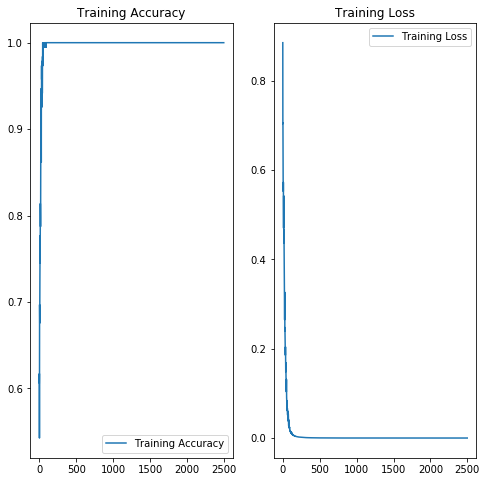

In [215]:
acc = history.history['accuracy']

loss = history.history['loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()


### Predict 

In [209]:
y_pred = model.predict(x_test) > 0.5

In [210]:
print(y_pred[:5])

[[ True]
 [ True]
 [ True]
 [ True]
 [ True]]


In [211]:
print("Accuracy of prediction is: {}".format(accuracy_score(y_test, y_pred)))

Accuracy of prediction is: 0.74


In [212]:
def plot_images(images_arr, labels_arr_true, labels_arr_pred):
    """
    This function will plot images in the form of a grid with 1 row and 5 columns 
    where images are placed in each column.
    
    credits to TensorFlow Team
    https://www.tensorflow.org/tutorials/images/classification
    """
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, lbl_true, lbl_pred, ax in zip(images_arr, labels_arr_true, labels_arr_pred, axes):
        img = np.reshape(img, (64, 64, 3))
        ax.imshow(img)
        ax.axis('off')
        ax.set_title('{0}, {1}'.format('Cat' if lbl_pred else 'Not a Cat', 'Cat' if lbl_true else 'Not a Cat'),
                    color='g' if lbl_pred==lbl_true else 'r')
    plt.show()

[47 40 41  6 49]


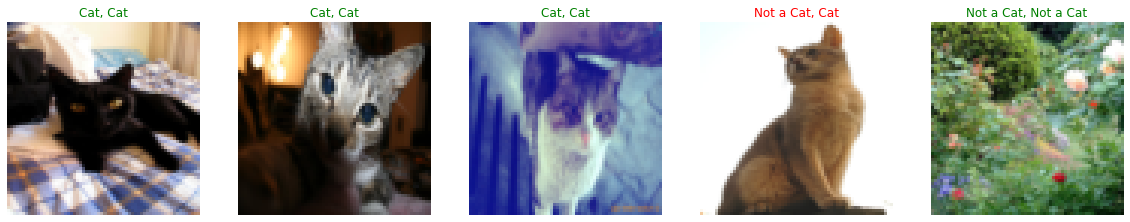

In [213]:
inds = np.random.choice(np.arange(50), 5)
print(inds)
plot_images(x_test[inds], labels_arr_true=y_test[inds], labels_arr_pred=y_pred[inds])

Since there are only 50 images in the test set, lets print them all.

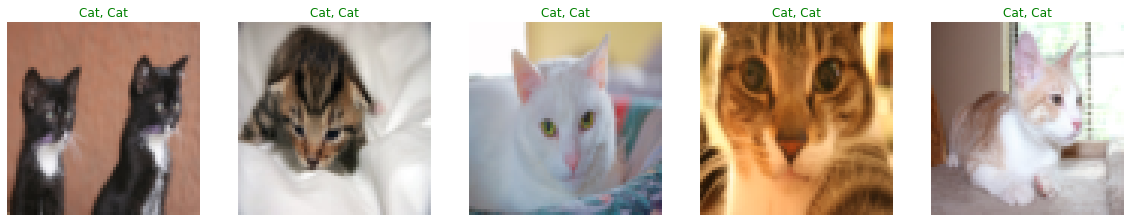

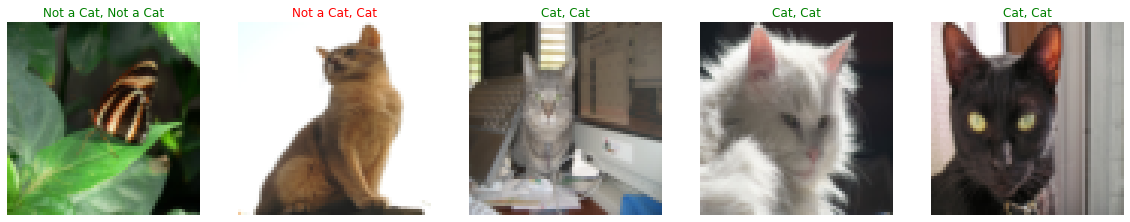

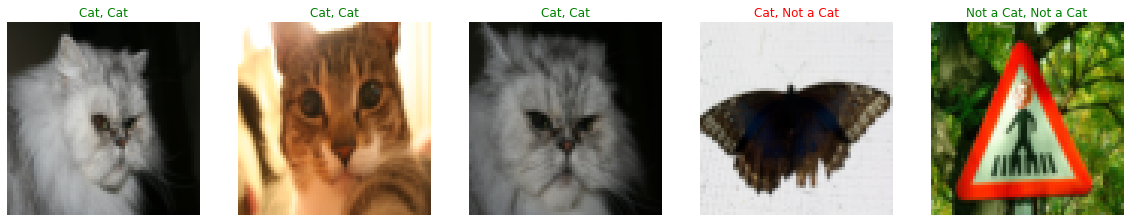

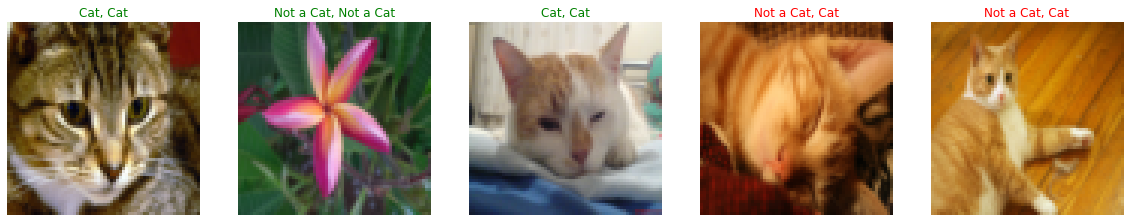

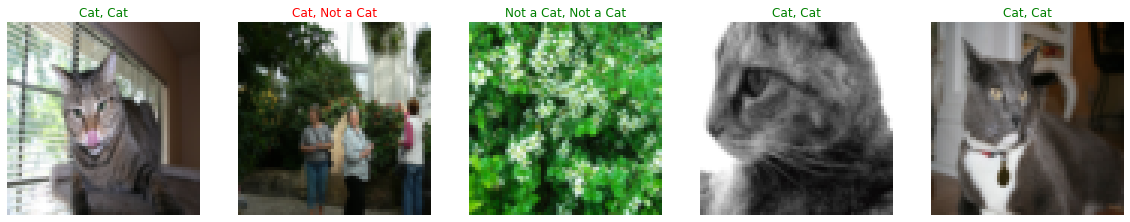

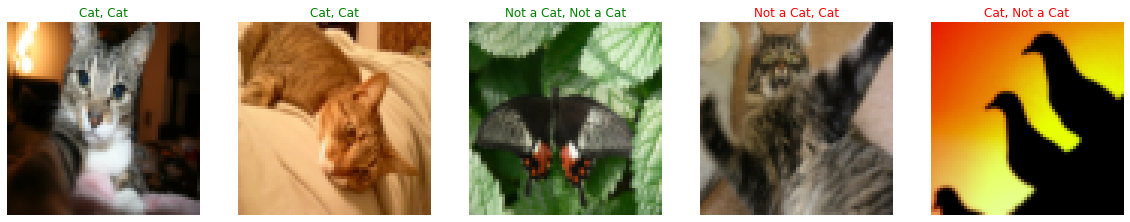

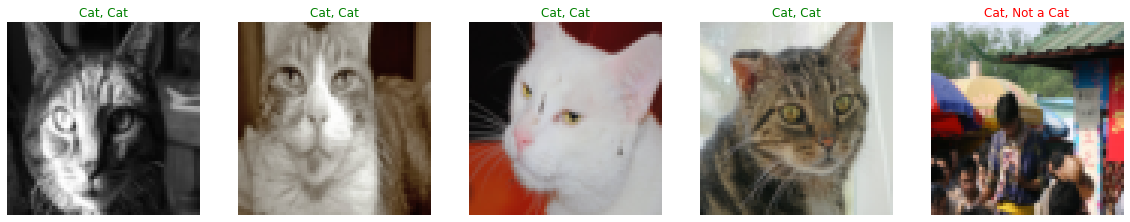

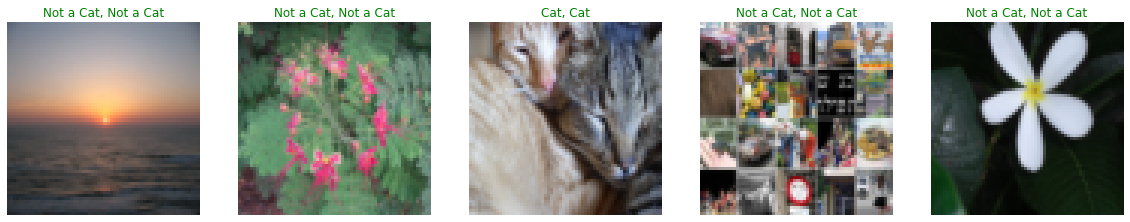

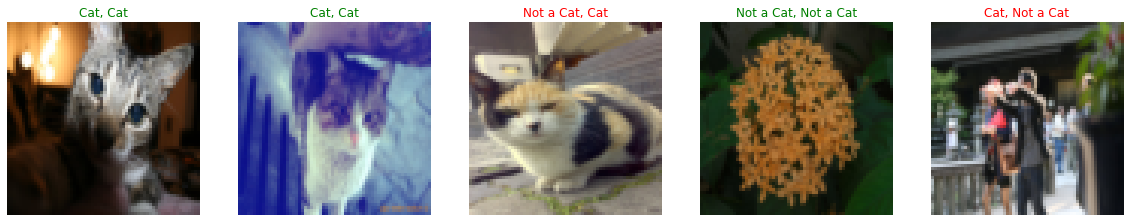

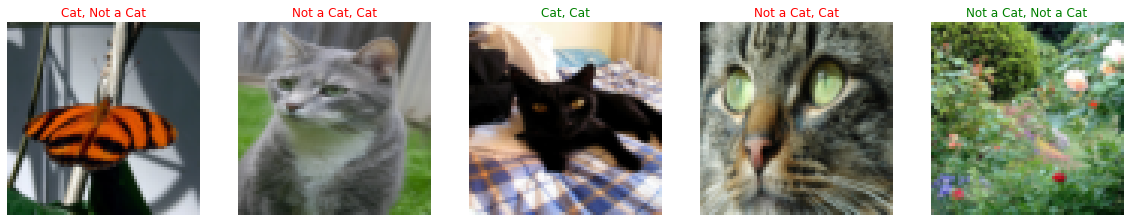

In [214]:
for i in range(10):
    inds = np.arange(i*5, (i*5)+5)
    plot_images(x_test[inds], labels_arr_true=y_test[inds], labels_arr_pred=y_pred[inds])